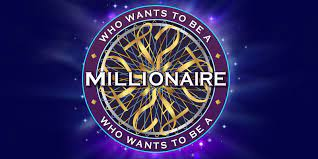

# 1) Given the following shopping baskets, what is the support of the Associaton Rule butter -> salt ?

{butter, bread, milk, sugar}

{butter, flour, milk, sugar}

{butter, eggs, milk, salt}

{eggs}

{butter, flour, milk, salt, sugar}

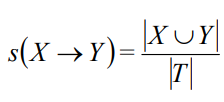

- a) 0.2
- b) 0.4
- c) 1
- d) 2


# 2) What is the confidence of the Associaton Rule butter -> salt ?

{butter, bread, milk, sugar}

{butter, flour, milk, sugar}

{butter, eggs, milk, salt}

{eggs}

{butter, flour, milk, salt, sugar}

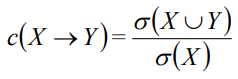

- a) 0.1
- b) 0.25
- c) 0.5
- d) 0.75

# 3) As we saw in the lecture, support and confidence by themselves can be misleading. What is the lift of the Association Rule butter -> salt?

{butter, bread, milk, sugar}

{butter, flour, milk, sugar}

{butter, eggs, milk, salt}

{eggs}

{butter, flour, milk, salt, sugar}

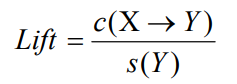

- a) 0.5
- b) 0.75
- c) 1.0
- d) 1.25

# 4) Given the lift from 3), would you consider butter -> salt a good rule?

{butter, bread, milk, sugar}

{butter, flour, milk, sugar}

{butter, eggs, milk, salt}

{eggs}

{butter, flour, milk, salt, sugar}

- a) Yes
- b) No

# 5) Given the following itemset tree, and the sets ABC ABD are considered frequent. When applying the apriori algorithm which other itemsets have to be considered frequent.

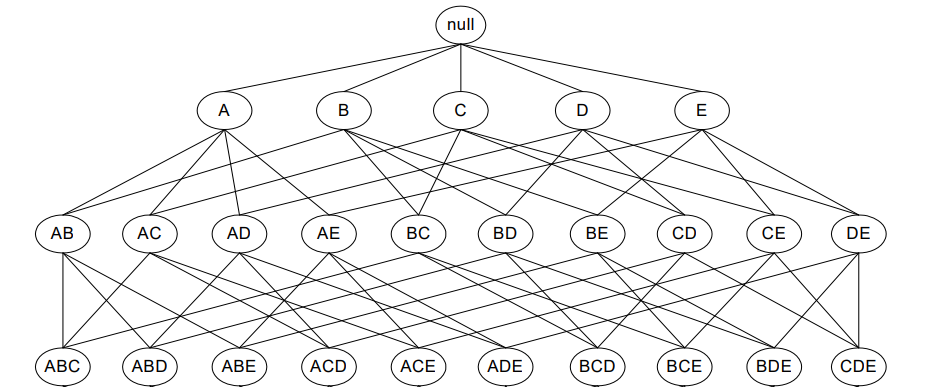

- a) AB, AC, AD, BC, A, B, C, D
- b) AB, AC, AD, BC, BD, CD, A, B, C, D
- c) AB, AC, AD, BC, BD, A, B, C, D
- d) AB, AC, AD, BC, BE, A, B, C, D, E

# Solutions below
----------------------------------------------

# 1) Given the following shopping baskets, what is the support of the Associaton Rule butter -> salt ?

{butter, bread, milk, sugar}

{butter, flour, milk, sugar}

{butter, eggs, milk, salt}

{eggs}

{butter, flour, milk, salt, sugar}

- a) 0.2
# b) 0.4
- c) 1
- d) 2


# 2) What is the confidence of the Associaton Rule butter -> salt ?

{butter, bread, milk, sugar}

{butter, flour, milk, sugar}

{butter, eggs, milk, salt}

{eggs}

{butter, flour, milk, salt, sugar}

- a) 0.1
- b) 0.25
# c) 0.5
- d) 0.75

# 3) As we saw in the lecture, support and confidence by themselves can be misleading. What is the lift of the Association Rule butter -> salt?

{butter, bread, milk, sugar}

{butter, flour, milk, sugar}

{butter, eggs, milk, salt}

{eggs}

{butter, flour, milk, salt, sugar}

- a) 0.5
- b) 0.75
- c) 1.0
# d) 1.25

# 4) Given the lift, would you consider butter -> salt a good rule?

{butter, bread, milk, sugar}

{butter, flour, milk, sugar}

{butter, eggs, milk, salt}

{eggs}

{butter, flour, milk, salt, sugar}

# a) Yes
- b) No

# 5) Given the following itemset tree, and the sets ABC ABD are considered frequent. When applying the apriori algorithm which other itemsets have to be considered frequent.

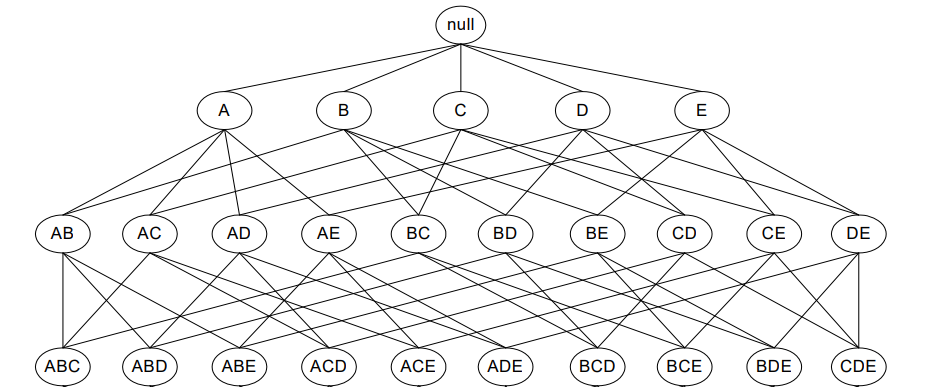

- a) AB, AC, AD, BC, A, B, C, D
- b) AB, AC, AD, BC, BD, CD, A, B, C, D
# c) AB, AC, AD, BC, BD, A, B, C, D
- d) AB, AC, AD, BC, BE, A, B, C, D, E

## Applying the Apriori Algorithmn

Apply the Apriori Algorithmn to the following dataset with min support = 0.6 and min confidence = 0.8


{butter, bread, milk, sugar}

{butter, flour, milk, sugar}

{butter, eggs, milk, salt}

{eggs}

{butter, flour, milk, salt, sugar}

# By Hand


### Frequent item sets

min support: 0.6 

s(butter) = $\frac{4}{5} = 0.8$

s(bread) = $\frac{1}{5} = 0.2$

s(milk) = $\frac{4}{5} = 0.8$

s(sugar) = $\frac{3}{5} = 0.6$

s(flour) = $\frac{2}{5} = 0.4$

s(eggs) = $\frac{2}{5} = 0.4$

s(salt) = $\frac{2}{5} = 0.4$

-----

s(butter, milk) = $\frac{4}{5} = 0.8$

s(milk, sugar) = $\frac{3}{5} = 0.6$

s(butter, sugar) = $\frac{3}{5} = 0.6$

------

s(butter, milk, sugar) = $\frac{3}{5} = 0.6$

### Rules

min conf: 0.8

no rules for item sets with 1 element

----

c(butter -> milk) = $\frac{\frac{4}{5}}{\frac{4}{5}} = 1.0$ 

c(milk -> butter) = $\frac{\frac{4}{5}}{\frac{4}{5}} = 1.0$

c(milk -> sugar) = $\frac{\frac{3}{5}}{\frac{4}{5}} = 0.75$

c(sugar -> milk) = $\frac{\frac{3}{5}}{\frac{3}{5}} = 1.0$

c(butter -> sugar) = $\frac{\frac{3}{5}}{\frac{4}{5}} = 0.75$

c(sugar -> butter) = $\frac{\frac{3}{5}}{\frac{3}{5}} = 1.0$

----

c(milk, sugar -> butter) = $\frac{\frac{3}{5}}{\frac{3}{5}} = 1.0$ 

c(butter, sugar -> milk) = $\frac{\frac{3}{5}}{\frac{3}{5}} = 1.0$

c(butter, milk -> sugar) = $\frac{\frac{3}{5}}{\frac{4}{5}} = 0.75$

----

c(milk -> butter, sugar) = $\frac{\frac{3}{5}}{\frac{4}{5}} = 0.75$ 

c(sugar -> butter, milk) = $\frac{\frac{3}{5}}{\frac{3}{5}} = 1.0$ 

c(butter -> milk, sugar) = $\frac{\frac{3}{5}}{\frac{4}{5}} = 0.75$ 

In [3]:
import pandas as pd
transactions = df = pd.DataFrame(data={
    "butter":[1,1,1,0,1],
    "bread":[1,0,0,0,0],
    "milk":[1,1,1,0,1],
    "sugar":[1,1,0,0,1],
    "flour":[0,1,0,0,1],
    "eggs":[0,0,1,1,0],
    "salt":[0,0,1,0,1]
})

In [15]:
from orangecontrib.associate.fpgrowth import *


# calculate frequent itemsets
itemsets = dict(frequent_itemsets(transactions.values, 0.6))

# store results in dataframe
rows = []
for itemset, support_count in itemsets.items():
    domain_names= ",".join([transactions.columns[item_index] for item_index in itemset])
    support = support_count / len(transactions.index)
    rows.append((len(itemset), support_count, support, domain_names))

item_set_table = pd.DataFrame(rows, columns=["size", "support count", "support", "items"])
item_set_table = item_set_table.sort_values('size')

item_set_table

,size,support count,support,items
0,1,4,0.8,butter
1,1,4,0.8,milk
3,1,3,0.6,sugar
2,2,4,0.8,"butter,milk"
4,2,3,0.6,"butter,sugar"
5,2,3,0.6,"milk,sugar"
6,3,3,0.6,"butter,milk,sugar"


In [16]:
# create association rules
rules = association_rules(itemsets, 0.8)

# calculate statistics and store results in a dataframe
rows = []
for premise, conclusion, sup, conf,cov, strength, lift, leverage  in rules_stats(rules, itemsets, len(transactions)):
    premise_names = [transactions.columns[item_index] for item_index in premise]
    conclusion_names = [transactions.columns[item_index] for item_index in conclusion]
    rows.append((premise_names, conclusion_names, sup, conf,cov, strength, lift, leverage, len(premise), len(conclusion)))

rule_table = pd.DataFrame(rows, columns = ['Premise', 'Conclusion', 'Support', 'Confidence', 'Coverage', 'Strength', 'Lift', 'Leverage', 'Premise_len', 'Conclusion_len'])
rule_table = rule_table.sort_values(['Premise_len', 'Conclusion_len'])
rule_table

,Premise,Conclusion,Support,Confidence,Coverage,Strength,Lift,Leverage,Premise_len,Conclusion_len
3,[milk],[butter],4,1.0,0.8,1.000000,1.25,0.16,1,1
4,[butter],[milk],4,1.0,0.8,1.000000,1.25,0.16,1,1
5,[sugar],[butter],3,1.0,0.6,1.333333,1.25,0.12,1,1
6,[sugar],[milk],3,1.0,0.6,1.333333,1.25,0.12,1,1
2,[sugar],"[butter, milk]",3,1.0,0.6,1.333333,1.25,0.12,1,2
0,"[milk, sugar]",[butter],3,1.0,0.6,1.333333,1.25,0.12,2,1
1,"[butter, sugar]",[milk],3,1.0,0.6,1.333333,1.25,0.12,2,1
